In [107]:
import pandas as pd
data=pd.read_csv(r'D:\ML\drug - drug.csv')

In [109]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [115]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [165]:
input=data.drop('Drug',axis='columns')
target=data['Drug']

In [167]:
target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [169]:
from sklearn.preprocessing import LabelEncoder

In [163]:
le_sex=LabelEncoder()
le_BP=LabelEncoder()
le_Cholesterol=LabelEncoder()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [151]:
inputs['Sex_n']=le_sex.fit_transform(data['Sex'])
inputs['BP_n']=le_BP.fit_transform(data['BP'])
inputs['Cholesterol_n']=le_Cholesterol.fit_transform(data['Cholesterol'])
inputs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Sex_n,BP_n,Cholesterol_n
0,23,0,0,0,25.355,0,0,0
1,47,1,1,0,13.093,1,1,0
2,47,1,1,0,10.114,1,1,0
3,28,0,2,0,7.798,0,2,0
4,61,0,1,0,18.043,0,1,0


In [155]:
inputs=inputs.drop(['Sex','BP','Cholesterol','Cholesterol_n','Age','Na_to_K'],axis='columns')
inputs.head()

,Sex_n,BP_n
0,0,0
1,1,1
2,1,1
3,0,2
4,0,1


In [157]:
le_Drug=LabelEncoder()

In [159]:
target=le_Drug.fit_transform(target)
target

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [171]:
from sklearn import tree

In [173]:
model=tree.DecisionTreeClassifier()

In [175]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [177]:
model.score(inputs,target)

0.52

In [179]:
model.predict([[0,0]])

D:\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

In [181]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

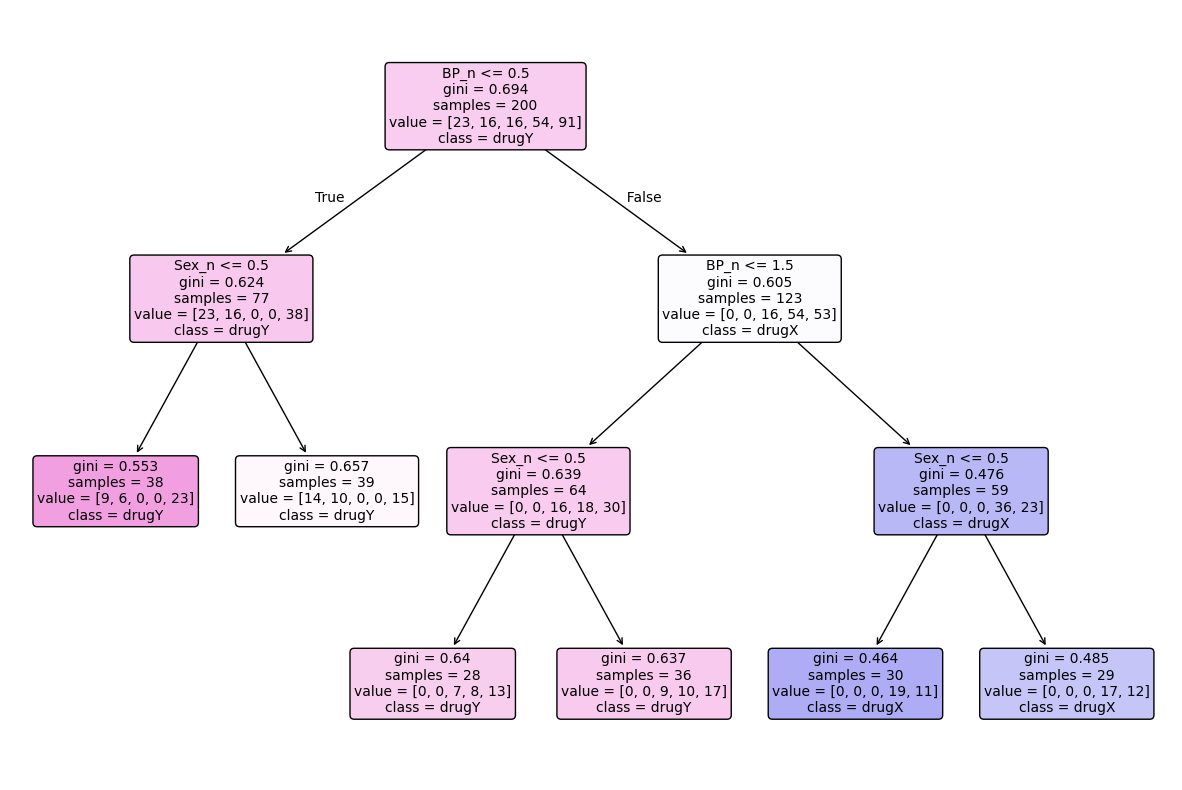

In [183]:
plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names=inputs.columns,
          class_names=[str(cls) for cls in model.classes_],
          filled=True,
          rounded=True,fontsize=10)
plt.show()